# Predicting Impact of Forest Fires

## Introduction

## Exploratory Data Analysis

After reading the libraries needed for this analysis, we read the data from our url and split it into testing (20%) and training (80%) datasets. 

In [1]:
# Read in relevant libraries
library(tidyverse)
library(GGally)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
#Set random seed to 123
set.seed(123)

#Read in the data 
forest_fire_data <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")

#Split into training and testing datasets
dt = sort(sample(nrow(forest_fire_data), nrow(forest_fire_data)*.8))
forest_train_data<-forest_fire_data[dt,]
forest_test_data<-forest_fire_data[-dt,]

#Print beginning and end of training dataset
head(forest_train_data)
tail(forest_train_data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
7,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
507,1,2,aug,fri,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00
508,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
510,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
513,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
514,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
516,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


| _Table 1: Initial Training Forest Fire Data_ |
| ------------------------ |
||

From Table 1, we see that our training dataset has 12 potential explanatory variables, besides the target variable ‘area’. Two are categorical, while the other 10 are numeric. We will clean this data up to have easily understandable column names. 


In [3]:
# Make human friendly columns 
forest_train_data <- forest_train_data %>%
    rename(
    x_axis_coord = X,
    y_axis_coord = Y,
    relative_humidity = RH,
    area_burned = area)

forest_test_data <- forest_test_data %>%
    rename(
    x_axis_coord = X,
    y_axis_coord = Y,
    relative_humidity = RH,
    area_burned = area)

head(forest_train_data)

,x_axis_coord,y_axis_coord,month,day,FFMC,DMC,DC,ISI,temp,relative_humidity,wind,rain,area_burned
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
7,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0


| _Table 2: Renamed Training Forest Fire Dataset_|
| ------------------------ |
||

To start off cleaning our data, we check whether any columns have missing data.

In [4]:
#Check for missing data
num_missing_cells <- sum(is.na(forest_fire_data))
num_missing_cells 

[1] 0

This shows that there are no missing cells in our initial dataset! To clean the data further, we can narrow down which explanatory variables to keep. The specific day of the week is not likely to have an impact on area burned, we believe any correlation found would be coincidental, so as such we will remove the column ‘day’ from the training dataset.

In [5]:
# Get rid of unimportant features in data: the day data
forest_train_clean_data <- select(forest_train_data, -day)
forest_test_clean_data <- select(forest_test_data, -day)
head(forest_train_clean_data)

,x_axis_coord,y_axis_coord,month,FFMC,DMC,DC,ISI,temp,relative_humidity,wind,rain,area_burned
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
7,8,6,aug,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0


| _Table 3: Clean Training Forest Fire Dataset_|
| ------------------------ |
||

In order to explore the variables' relations with one another, we will use ggpairs to plot the pairs of scatterplots for all the numeric variables (month is not included as it is categorical).

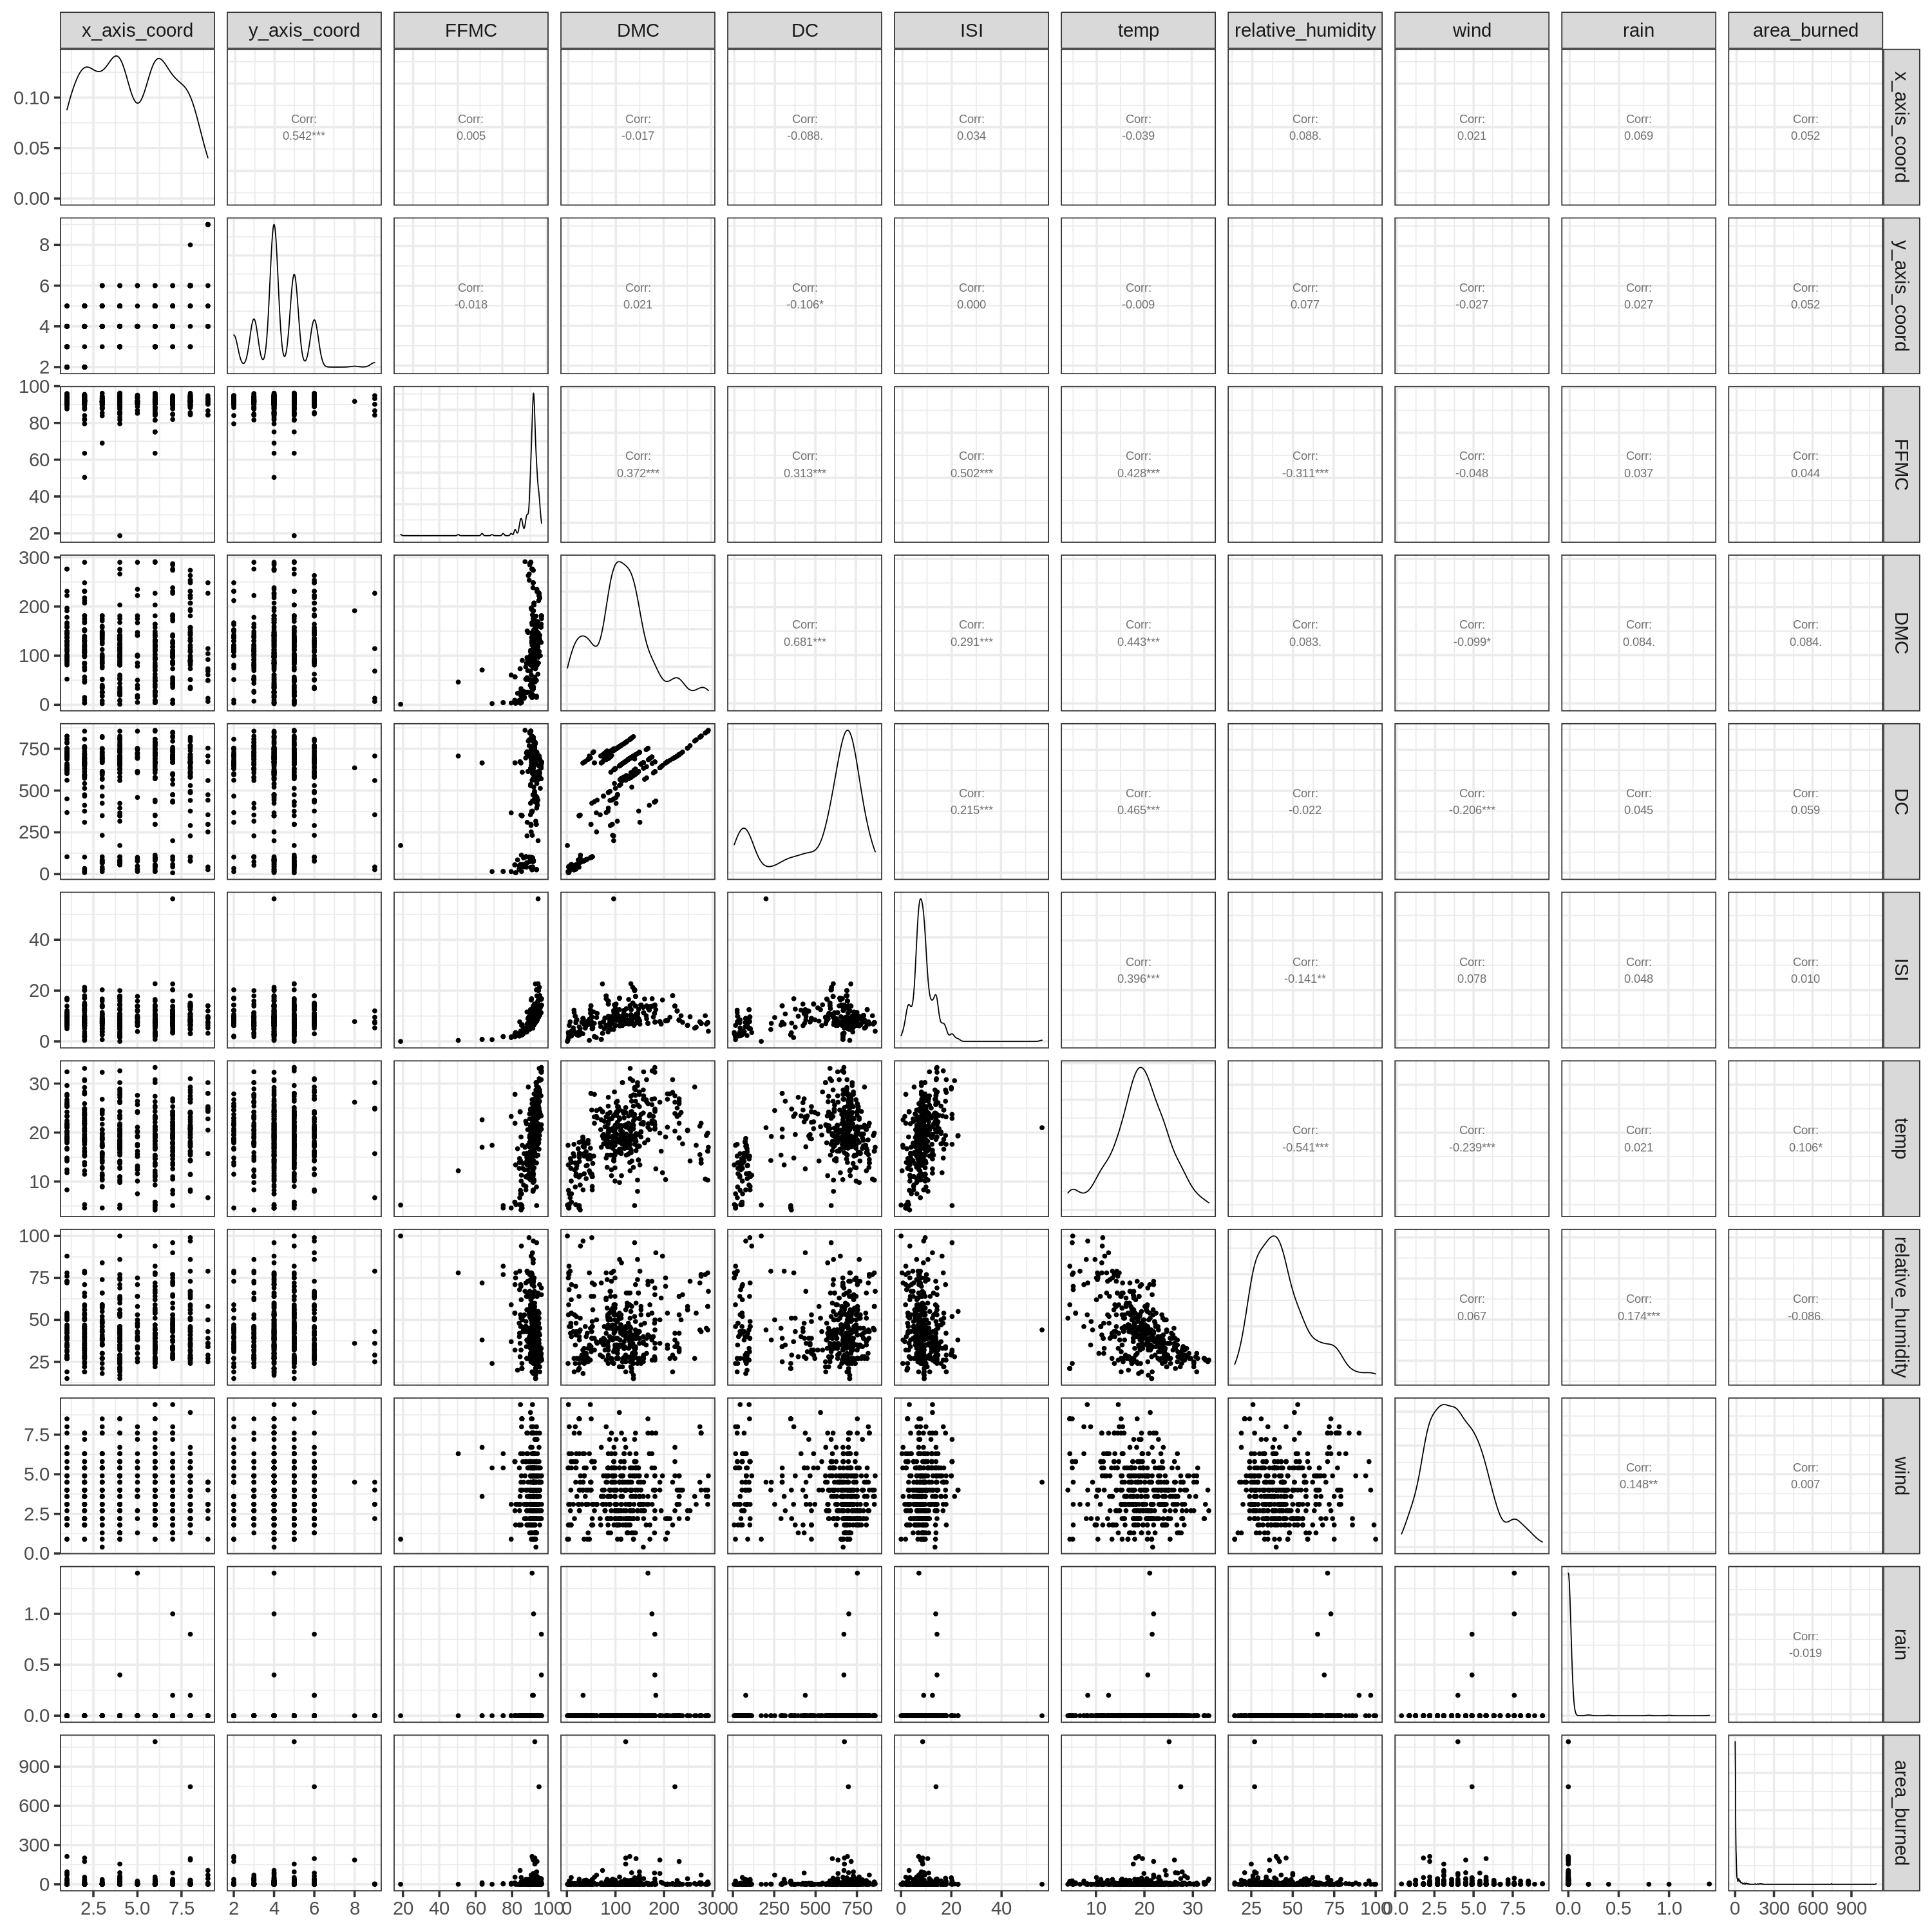

In [6]:
options(repr.plot.width = 25, repr.plot.height = 25) 

# GG pairs
forest_fire_numeric_data <- forest_train_clean_data %>%
    select(-month)
forest_fire_ggpairs <- ggpairs(forest_fire_numeric_data) +
    theme_bw(base_size = 22)
forest_fire_ggpairs

| _Figure 1: GGpairs Plot of All Numeric Variables in Clean Training Forest Fire Dataset_|
| ------------------------ |
||

Looking at `forest_fire_ggpairs`, there is a wide range of relationships between the different variables. For example, the variables `wind` and `temp` don't appear to have a strong correlation, as the scatterplot for the two looks to be a general cloud of data points. On the other hand, we can begin to see stronger correlation, such as `DC` and `DMC`, which clearly show some positive correlation. 

Looking at the column in this figure for `area_burned`, we see that `temp` has the highest correlation (0.106), with `DMC` being a close second (0.084). 

From this figure we can conclude there is a wide range of relationships between variables, so to further explore this we will create a heat map. 


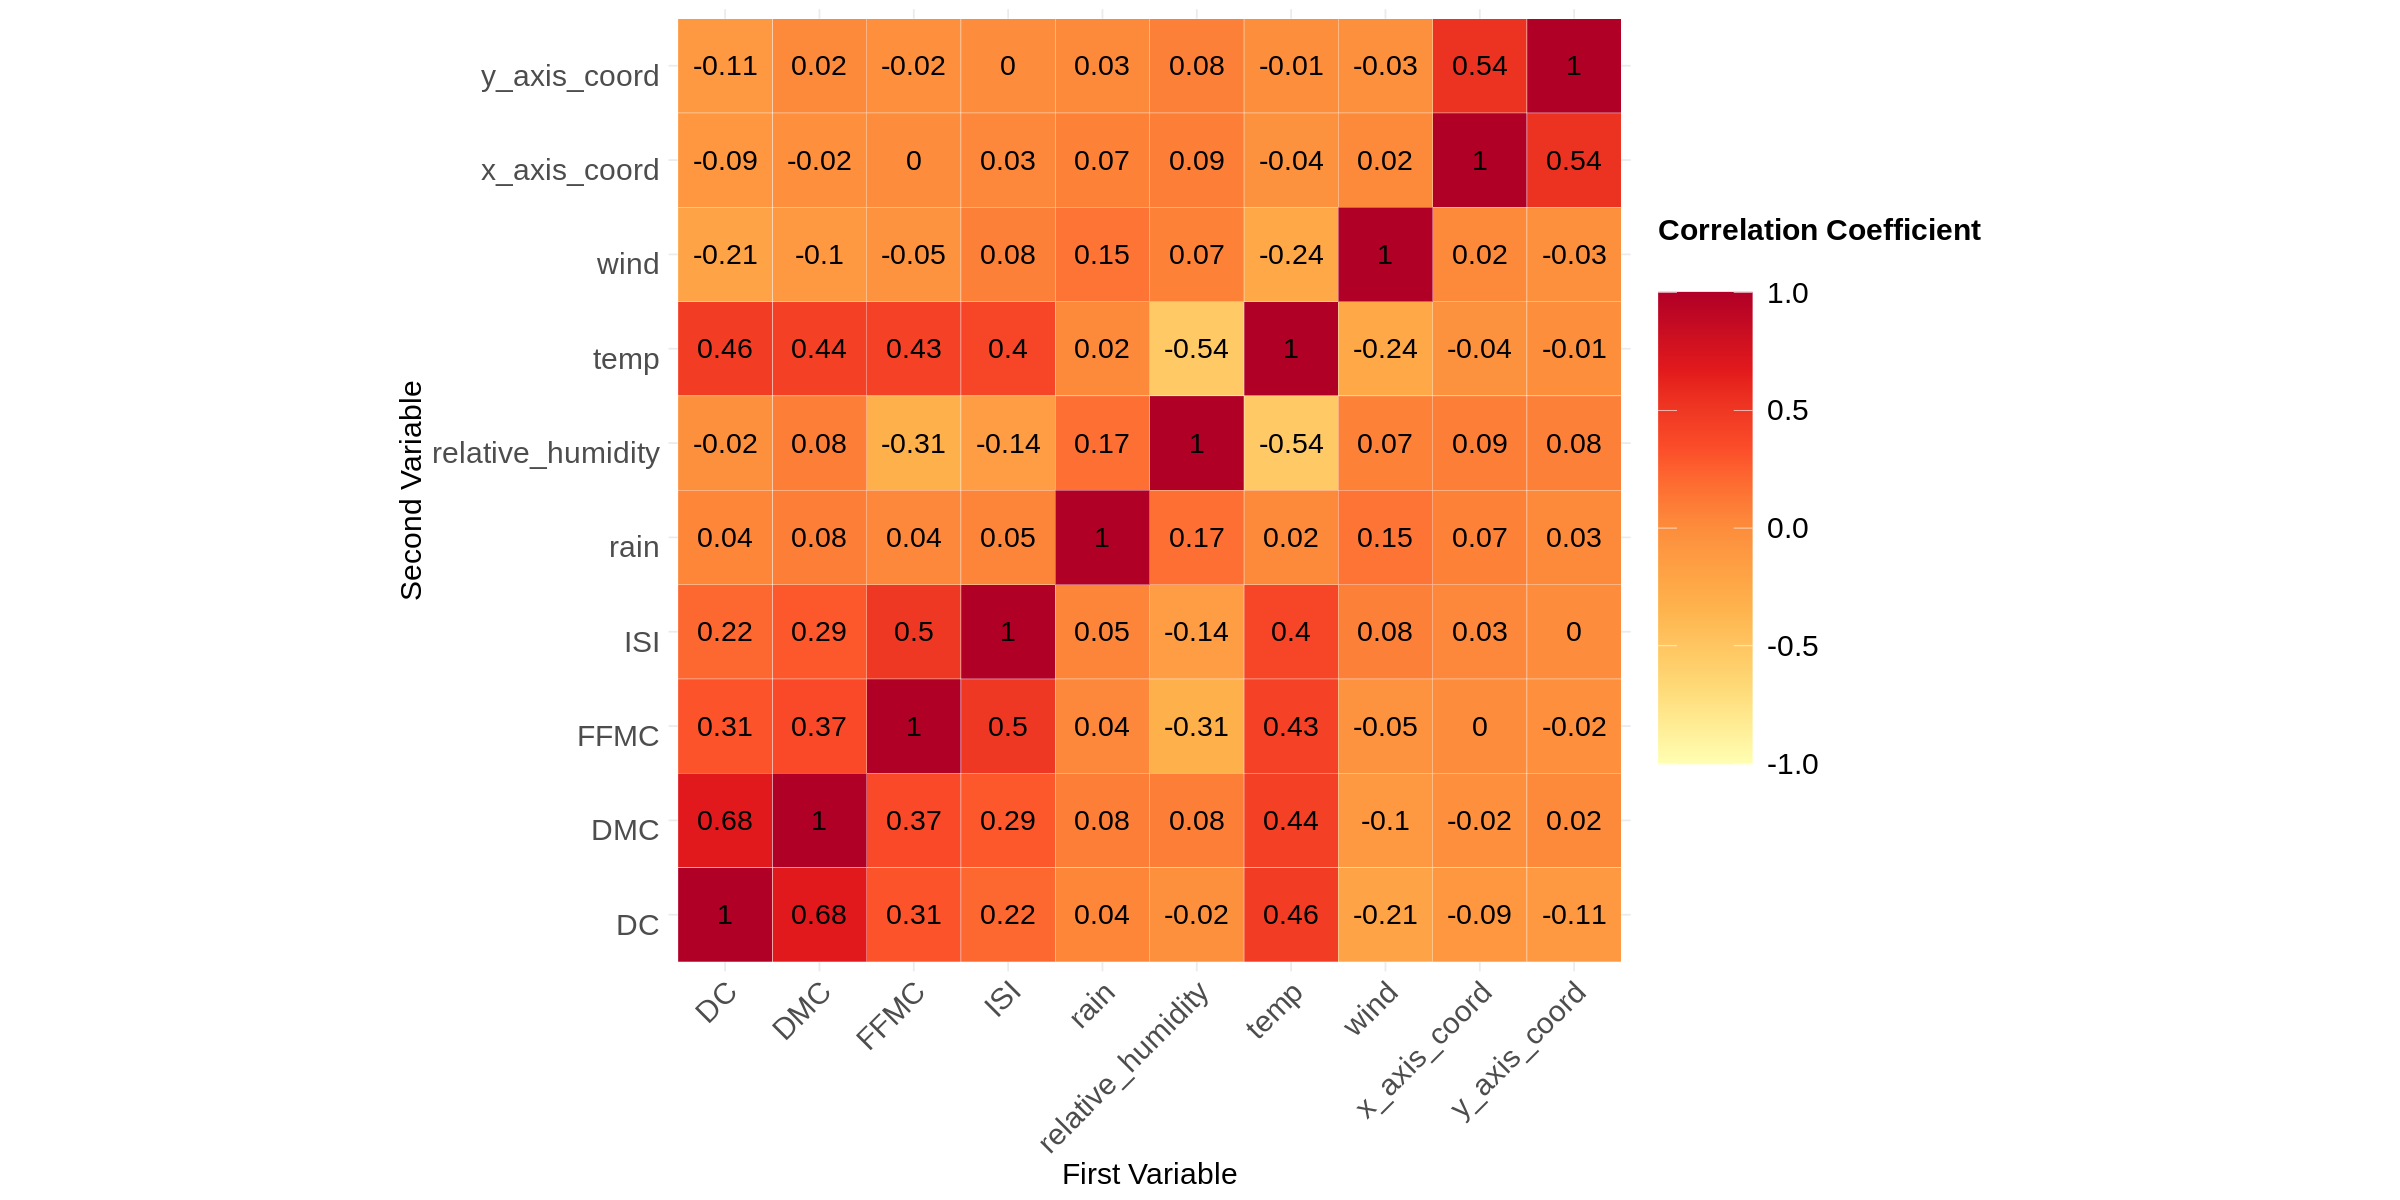

In [7]:
options(repr.plot.width = 20, repr.plot.height = 10) 

# Heat Map 

#First, find correlation matrix for all potential explanatory variables
corr_matrix_forest_fire <- forest_fire_numeric_data %>%
  select(- area_burned) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

#Create the Heat Map based on the correlation matrix found 
plot_corr_matrix_forest_fires <- corr_matrix_forest_fire %>%
  ggplot(aes(x = var1, y = var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "YlOrRd", direction = 1, limits = c(-1, 1)) +
  labs(x = "First Variable", y = "Second Variable") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    axis.title = element_text(size = 18),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_forest_fires

| _Figure 2: Heat Map of All Numeric Variable Correlations_|
| ------------------------ |
||

Based on the heat map, we can see that the most correlated variables are DMC & DC (0.68), while all other correlations are below 0.55. This suggests that we will need eliminate either DMC or DC in order to ensure our results are not impacted by colinearity.

To conclude our exploratory analysis, we will take a look at a couple of summary statistics for all of our numeric variables. Specifically, we will look at their mean, standard deviation, min, and max.

In [8]:
# Get list of means of each variable
var_means <- apply(forest_fire_numeric_data,2,mean)

# Get list of standard deviations of each variable
var_sd <- apply(forest_fire_numeric_data,2,sd)

# Get list of minimums of each variable
var_min <- apply(forest_fire_numeric_data,2,min)

# Get list of maximums of each variable
var_max <- apply(forest_fire_numeric_data,2,max)

#In order to format the above information properly, we have created a markdown cell below

| Summary Statistic        |   x_axis_coord   |   y_axis_coord    | FFMC |DMC    | DC | ISI    | temp | relative_humidity    | wind |  rain   | area_burned |
| -------- | --------- | --------- | --------- |  --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| Mean     |  4.65| 4.27 | 90.72 |  113.95 | 556.71 | 9.10 | 19.08 | 43.87 | 3.99 | 0.01 | 13.9 |
| Standard Deviation   | 2.35 | 1.23| 5.55|  64.39 | 244.99 | 4.64 | 5.80 | 16.57 | 1.79 | 0.10 | 69.5 |
| Minimum Value   | 1 | 2| 18.7|  1.1 | 7.9 | 0 | 4.2 | 15 | 0.4 | 0 | 0 |
| Maximum Value   | 9 | 9| 96.2|  291.3 | 860.6 | 56.1 | 33.3 | 100 | 9.4 | 1.4 | 1090.84 |


| _Table 4: Summary Statistics For All Numeric Variables_|
| ------------------------ |
||

From Table 4, we can see that our numeric variables have a wide variety of means, standard deviations and ranges. As such, they will need to be scaled in the future in order to ensure that no one variable is deemed "more important" than any other simply due to its range.

Doing this will help us to eliminate any bias, and ensure accurate results in our report!
From this exploratory analysis, we can conclude that all the remaining variables are worth further investigation in our project as explanatory variables to area burned.


## Methods: Plan

In this analysis, we are drawing from a data set that is trustworthy. For one, there are no missing values. This means we don’t have to omit any observations, or fill in blanks ourselves, which makes our report more reliable. Additionally, the nature of the data is objective. By taking measurements of location, weather aspects, and area burnt, there is very little human subjectivity involved. Finally, by setting the seed to maintain consistent results and explaining our decision-making along the way, we will produce a reproducible and trustworthy report from the data.

**Methods we plan to use:**

- Use training data to apply forward substitution and Bayesian Information Criterion (BIC) values to choose predictor variables
- Use training data to utilize Asymptotic and Bootstrap methods to create linear regression models which will predict "area burned", our response variable 
- Compare the Asymptotic and Bootstrap methods
- Check for issues such as Heteroscedasticity, Normality, and Multicollinearity in our model, and adjust our model accordingly to rectify them
- With our test data, evaluate the statistical model using the Test Mean Squared Error
- Make a prediction using local forest data from British Columbia, while keeping in mind issues around generalizability


**We expect to achieve:**

Given the necessary information about a location, we expect to be able to predict with reasonable accuracy the area burned if a forest fire were to occur in that location. We also expect to go through a systematic, reproducible, process to determine which predictor variables create a good statistical model.

**Potential impact:**

Our report could be useful in many ways. For one, our results could help with resource designation, as there are only a finite amount of resources for fire-fighting. Therefore, if we know, for example, that low humidity is a big indicator of forest fire area, we can allocate more fire-fighting resources to areas with low-humidity than to high-humidity areas. In addition, our results could help with fire-preparation. If the data indicates that a fire is predicted to cover a very large area, it could be life saving to alert citizens of the danger to evacuate with ample warning.

## References